# 10.27-11.05 HW06: Regression-Part 1

This homework is after Lec 07 and Tut 07, which are all about simple linear regression. At the beginning of today's work, it may be better to recover all this stuff as a whole.<br>
First, the regression here is our try to find a relation between different varibles. Considering that all the data here are numerical, so we want to find a statistic(for sample in reality) or a parameter(for the population in theory) to measure whether the variables are related to each other(or our analysis later can be meaningless). The number we constructed for this property is the correlation coefficient, related to the covariance.<br>
Now for regression, our idea is that we simulate a model and get sample from it, then we catch the real result for each input, compare the difference(error) and check whether the total error is acceptable or not. If so, we say we get a good model for representing the relation between variables. Affected by the aim, we may control the difference in samples to be small enough.(unbiased estimation)<br>
As we can see, the difficult point here is the understanding of correlation, the difference between the parameters of original model and the cofficients in estimated model, the foundation of building the model and how can we check the model for sure(inference?).<br>

Now, let's get to the "dirty work".

## HW of Oct. 21
The links of ChatBot dialogue: https://chatgpt.com/share/6727d2f3-d7f0-8008-b454-2641b8e01f52

Summary of dialogue:

1. **Simple Linear Regression Concepts**:
   - We discussed the basics of simple linear regression, including the roles of predictor (independent variable) and outcome (dependent variable), as well as the significance of the slope and intercept in the regression equation.

2. **Normal Distribution and Sampling**:
   - We explored why the error term in the regression model is often assumed to follow a normal distribution, emphasizing the importance of having a sufficiently large and randomly sampled dataset.

3. **Python Code for Simulation and Visualization**:
   - You requested Python code to simulate a simple linear regression dataset using NumPy and SciPy, and we switched to using Plotly for visualization.
   - We created a simulation that included generating random data, fitting a linear regression model, and visualizing the results.

4. **Model Fitting with Statsmodels**:
   - We discussed how to fit a simple linear regression model using the `statsmodels` library and how to extract the model parameters, fitted values, and summary statistics.
   - We covered the meaning of various outputs from `fitted_model.summary()` and how to interpret model parameters like the intercept, slope, \( R^2 \), and more.

5. **Visualizing Fitted Lines**:
   - You inquired about how to visualize both the fitted regression line and the true regression line on a single plot, which we accomplished using Plotly.

6. **Understanding Fitted Values**:
   - We examined how fitted values are derived from the fitted model parameters and confirmed that fitted values match those calculated manually from the regression equation.

7. **Final Clarifications**:
   - We clarified the meaning of the fitted line and fitted model, emphasizing their roles in understanding the relationship between variables and assessing model performance.

### Q1: Explanation on theoretical Simple Linear Regression model by describing the components and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

Simple linear regression model in theory, as I noticed in the beginning part, is used for catching the possible relation between variables. In the simplest case, we have two variables and we want to get the relation between them. Then we must guess one variable's changing could affect another. The "input", or say, self-changing variable is the **predictor variable**. By the contrast, the affected one is an **outcome variable**. The effect of changing one unit of "predictor" on the "outcome" is the slope if the whold model is linear. And the intercept coefficient is the value of outcome variable when the predictor variable is zero, which means this part of outcome will not be affected by the change of "input". However, we can not say that our prediction is 100% correct, so there is the error term in the model for the part we are not able to describe in the relation, like uncertainty.

To get the regression model, we can not simply just use a few points. Generally speaking, every pair of predictor and outcome and selection are following the normal distribution. We need to get a lot of samples(pairs) randomly following normal distribution to get a general model of the two variables. So every selection get one possible regression, all the selections' regressions finally will turn out to be normal distribution.

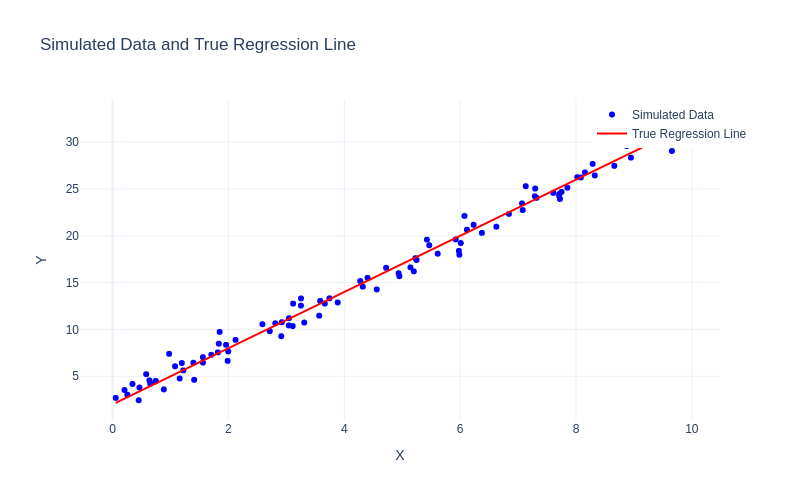

In [15]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters
n = 100              # Number of data points
beta_0 = 2           # Intercept
beta_1 = 3           # Slope
sigma = 1            # Standard deviation of errors

# Generate random X values (can be uniformly distributed)
X = np.random.uniform(0, 10, n)

# Generate random error terms from a normal distribution
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate Y using the linear model: Y = beta_0 + beta_1 * X + errors
Y = beta_0 + beta_1 * X + errors

# Create the plot with Plotly
fig = go.Figure()

# Scatter plot of the generated data
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Simulated Data', marker=dict(color='blue')))

# Plot the true regression line (without noise)
fig.add_trace(go.Scatter(x=X, y=beta_0 + beta_1 * X, mode='lines', name='True Regression Line', line=dict(color='red')))

# Customize the layout
fig.update_layout(
    title='Simulated Data and True Regression Line',
    xaxis_title='X',
    yaxis_title='Y',
    template='plotly_white',
    legend=dict(x=0.8, y=1),
    width=800,
    height=500
)

# Show the plot
fig.show(renderer = 'png')


### Q2: Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf
We continue the process, using different packages and libraries.


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9289.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           6.65e-99
Time:                        19:35:36   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

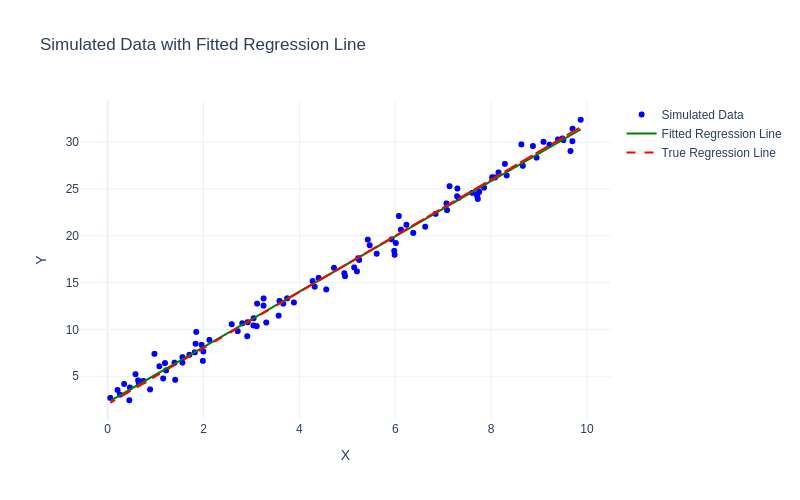

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the simulation
n = 100             # Number of data points
beta_0 = 2          # Intercept
beta_1 = 3          # Slope
sigma = 1           # Standard deviation of errors

# Generate random X values
X = np.random.uniform(0, 10, n)

# Generate random errors from a normal distribution
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate Y using the linear model: Y = beta_0 + beta_1 * X + errors
Y = beta_0 + beta_1 * X + errors

# Create a pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 1: Fit the model using statsmodels
model = smf.ols('Y ~ X', data=data)
results = model.fit()

# Step 2: Print the summary of the model (optional, to see the coefficients and statistics)
print(results.summary())

# Step 3: Extract fitted values from the model
data['Y_pred'] = results.fittedvalues

# Step 4: Visualize the simulated data and fitted regression line using Plotly
fig = go.Figure()

# Scatter plot of the original data
fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], mode='markers', name='Simulated Data', marker=dict(color='blue')))

# Plot the fitted regression line
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_pred'], mode='lines', name='Fitted Regression Line', line=dict(color='green')))

# Plot the true regression line for comparison
fig.add_trace(go.Scatter(x=data['X'], y=beta_0 + beta_1 * data['X'], mode='lines', name='True Regression Line', line=dict(color='red', dash='dash')))

# Customize the layout
fig.update_layout(
    title='Simulated Data with Fitted Regression Line',
    xaxis_title='X',
    yaxis_title='Y',
    template='plotly_white',
    width=800,
    height=500
)

# Show the plot
fig.show(renderer = 'png')


### Q3: Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation
The first line, is set by our design. Given that $\beta_0$ and $\beta_1$ are decided, so the line here is actually fixed. What we do is to get x randomly, with normally-distributed error, so now we have the "real y" as points and "predicted y" on the line.

The second line, however, comes from the points already existed. By using the OLS method, we simulate the "most possible line" which may reflect the relation. This still has difference with the original "real line".

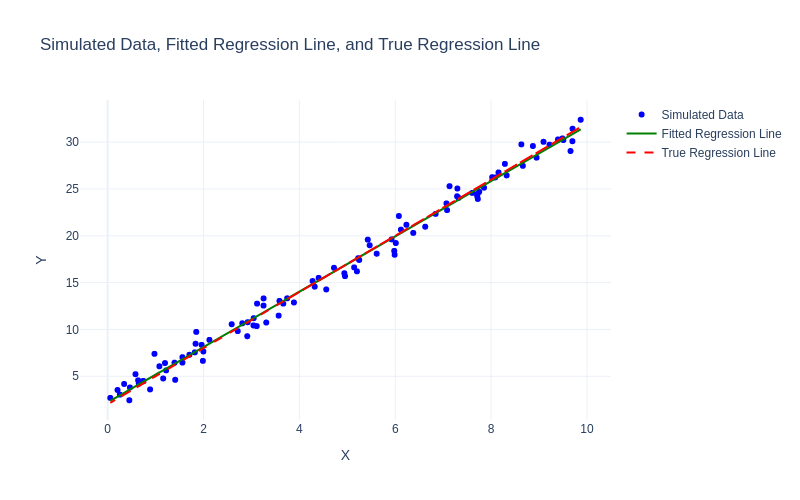

In [14]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the simulation
n = 100             # Number of data points
beta_0 = 2          # Intercept
beta_1 = 3          # Slope
sigma = 1           # Standard deviation of errors

# Generate random X values
X = np.random.uniform(0, 10, n)

# Generate random errors from a normal distribution
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate Y using the linear model: Y = beta_0 + beta_1 * X + errors
Y = beta_0 + beta_1 * X + errors

# Create a pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 1: Fit the model using statsmodels
model = smf.ols('Y ~ X', data=data)
results = model.fit()

# Step 2: Extract fitted values from the model
data['Y_pred'] = results.fittedvalues

# Create a Plotly figure
fig = go.Figure()

# Scatter plot of the original data
fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], mode='markers', name='Simulated Data', marker=dict(color='blue')))

# Plot the fitted regression line
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_pred'], mode='lines', name='Fitted Regression Line', line=dict(color='green')))

# Plot the true regression line for comparison
fig.add_trace(go.Scatter(x=data['X'], y=beta_0 + beta_1 * data['X'], mode='lines', name='True Regression Line', line=dict(color='red', dash='dash')))

# Customize the layout
fig.update_layout(
    title='Simulated Data, Fitted Regression Line, and True Regression Line',
    xaxis_title='X',
    yaxis_title='Y',
    template='plotly_white',
    width=800,
    height=500
)

# Show the plot
fig.show(renderer = 'png')


### Q4:Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The fitted values come from the equation given by the fitted, like giving input into the fitted coefficient and we can get the outcomes as fitted values.


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# Simulate data
np.random.seed(42)
n = 100
beta_0 = 2
beta_1 = 3
sigma = 1
X = np.random.uniform(0, 10, n)
errors = norm.rvs(loc=0, scale=sigma, size=n)
Y = beta_0 + beta_1 * X + errors

# Create DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit model
model = sm.OLS(data['Y'], sm.add_constant(data['X']))  # Add constant for intercept
fitted_model = model.fit()

# Access fitted parameters
params = fitted_model.params
print("Parameters:")
print(params)

# Calculate fitted values manually
data['Y_pred_manual'] = params['const'] + params['X'] * data['X']

# Compare fitted values from model and manual calculation
data['Y_pred'] = fitted_model.fittedvalues

# Display first few rows
print(data[['X', 'Y', 'Y_pred', 'Y_pred_manual']].head())


Parameters:
const    2.215096
X        2.954023
dtype: float64
          X          Y     Y_pred  Y_pred_manual
0  3.745401  13.323251  13.279096      13.279096
1  9.507143  30.222422  30.299412      30.299412
2  7.319939  24.051579  23.838363      23.838363
3  5.986585  17.972186  19.899604      19.899604
4  1.560186   6.460887   6.823922       6.823922


### Q5: Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"
#### What line is chosen
When the total sum of distances between points and the line is the smallest, we chose the line to be the fitted model. (smallest sum of residual)That is to say, the expectation of the sum of the square of difference of $y$ and $\beta_0$+$\beta_1 x$(predicted y by model)to be smallest.
#### Why it requires squares
sometimes the difference can be negative, that is to say, the actual point is under the regression line. If we don't ask for the square value, then the different values with opposite symbol can elimate each other, which may affect the result.
### Q6: Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.
1. 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
2. fitted_model.rsquared
3. np.corrcoef(Y,fitted_model.fittedvalues)\[0,1\]**2
4. np.corrcoef(Y,x)\[0,1\]**2
#### The explained part of variation of 1
the part in the brackets is the total residual which has been standardized(without the effect from units), so 1 minus this is the proportion unexplained.
#### R^2
when this $R^2$ becomes smaller and smaller, the explained variance is bigger and bigger, so the model's ability of explaining is improving.
#### the capture of np.corrcoef(Y,x)\[0,1\]**2
the explained variance of real y and predicted y in the models.

### Q7: Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below
Assumption 1: linearity
Assumption 2: slope > 0
Assumption 3: errors' following normal distribution

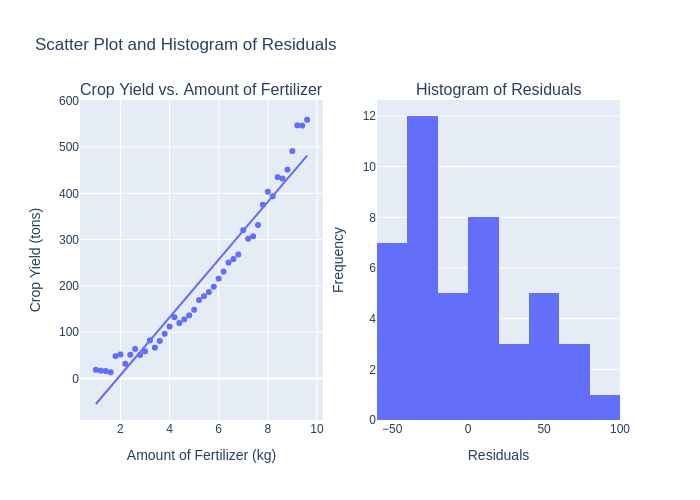

In [13]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## HW of Nov. 4' s week
link to the ChatBot dialogue: https://chatgpt.com/share/672833a2-8b64-8008-8fc5-0704aeb95620
summary of the dialogue:
1. **Analysis of Wait Times**:
   - We discussed the analysis of the Old Faithful geyser eruption durations based on wait times, comparing short wait times (< 68 minutes) to long wait times (≥ 68 minutes) using various statistical approaches.

2. **Statistical Models**:
   - You initially specified several linear regression models using `statsmodels`:
     - Overall model: `smf.ols('duration ~ waiting', data=old_faithful)`.
     - Model for short wait times: `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`.
     - Model for long wait times: `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`.

3. **Indicator Variable Model**:
   - We transitioned to an indicator variable approach, modeling eruption duration as a function of whether the wait time was classified as "short" or "long" using:
     \[
     Y_i = \beta_0 + 1_{\text{long}}(k_i) \beta_{\text{contrast}} + \epsilon_i
     \]
   - This model allows for the assessment of average differences in eruption duration based on wait time categorization.

4. **Comparison of Methods**:
   - We compared the indicator variable model with two sampling approaches: the permutation test and bootstrap confidence interval.
   - Key similarities included their goal of assessing differences in means and the use of randomization.
   - Differences were highlighted in their statistical frameworks, result interpretations, flexibility, and robustness to assumptions.

5. **Permuation Test**:
   - We performed a permutation test to evaluate the null hypothesis \(H_0: \mu_{\text{short}} = \mu_{\text{long}}\) by shuffling the labels of duration data for both groups and calculating mean differences.

6. **Bootstrap Confidence Interval**:
   - We created a 95% bootstrap confidence interval by resampling within each group to estimate the mean difference and its uncertainty.

7. **Comparison Table**:
   - A table was provided summarizing the key similarities and differences between the indicator variable model, permutation test, and bootstrap confidence interval, outlining their objectives, methodologies, assumptions, and interpretations.

Overall, the conversation explored the statistical analysis of eruption durations in the context of wait times, emphasizing different approaches for hypothesis testing and confidence interval estimation, as well as how these methods relate to linear regression modeling.

some practices on the following data

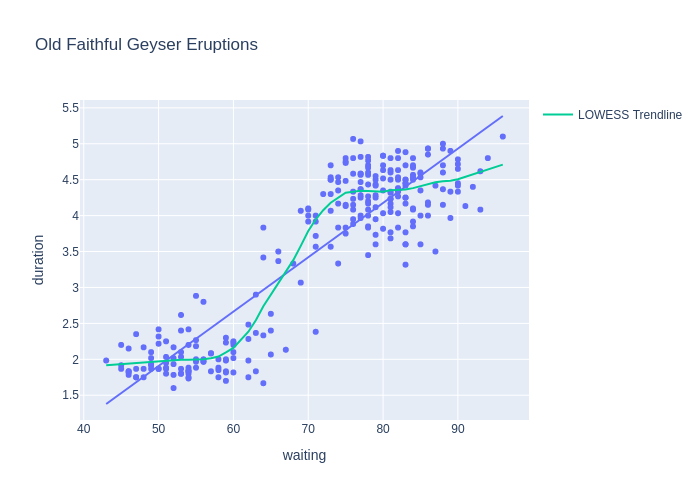

In [18]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


### Q8: Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.
$H_0$: $\beta_1$ = 0, $H_a$: $\beta_1$ is not zero.
From the summary, we know that coefficient($\beta_1$) is different from 0(0.0756).And its p-value is extremely small(close to 0), while the $R^2$ here is 81.1% means that most of the variance is explained.
So, $\beta_1$ is not 0, then there exists linear relationship between the two variables.

In [19]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        20:35:29   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q9: As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.
#### Is there any evidence in data for a relationship?
Here we has no evidence against the null hypothesis that there is no linear relationship between the two.
So there is. Like p-value here is greater than 0.1(0.238).
#### evidence against the $H_0$
while the value is 62: we has no evidence to reject the $H_0$, as p-value is greater than 0.1,<br>
for value 64: we has moderate evidence against $H_0$ for the p-value here is 0.03, between 0.01 and 0.05,<br>
for value 66: we has very strong evidence against $H_0$ for the p-value here is 0.000, smaller than 0.001.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


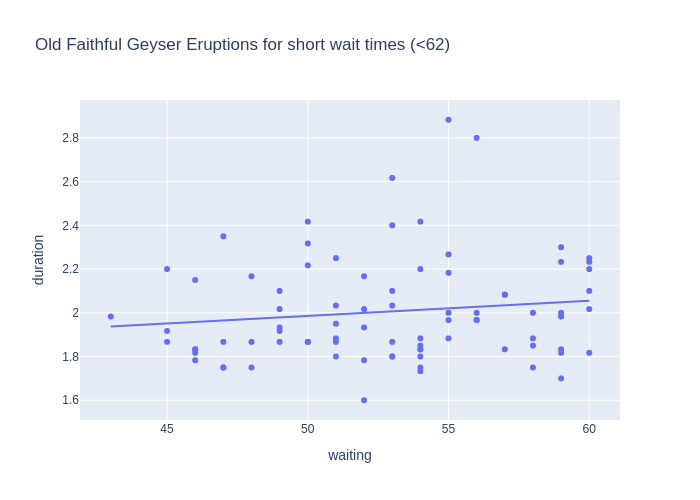

In [22]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [23]:
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Analyze the effect of short wait times
for limit in [62, 64, 66]:
    # Filter the data for wait times less than the limit
    short_wait_data = old_faithful[old_faithful['waiting'] < limit]
    
    # Fit the OLS model
    model = smf.ols('duration ~ waiting', data=short_wait_data)
    fitted_model = model.fit()
    
    # Print the summary
    print(f"Summary for waiting < {limit}:")
    print(fitted_model.summary())

Summary for waiting < 62:
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.410
Date:                Sun, 03 Nov 2024   Prob (F-statistic):              0.238
Time:                        20:55:24   Log-Likelihood:                 2.3238
No. Observations:                  83   AIC:                           -0.6475
Df Residuals:                      81   BIC:                             4.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401     

### Q10: Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following
1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models
2. simulate samples (of size n=160) from a Simple Linear Regression model that uses $\beta_0$ = 1.65, $\beta_1$ = 0, $\sigma$ = 0.37 along with the values of waiting for x to create simuations of Y and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"
3. report if  is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful \[long_wait\]).fit().summary().tables\[1\]?

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


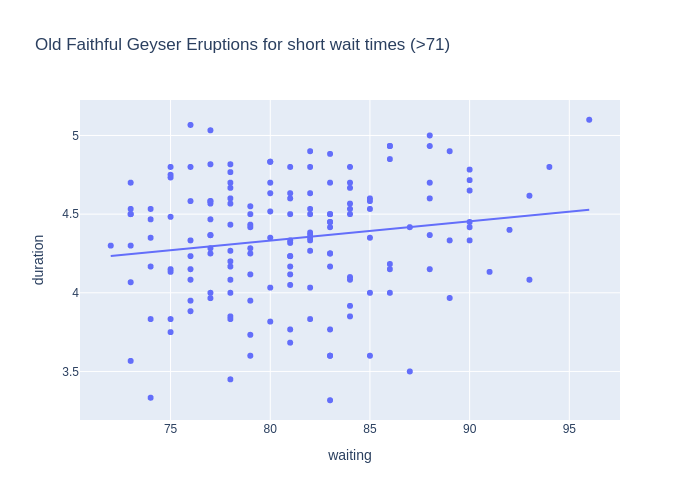

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


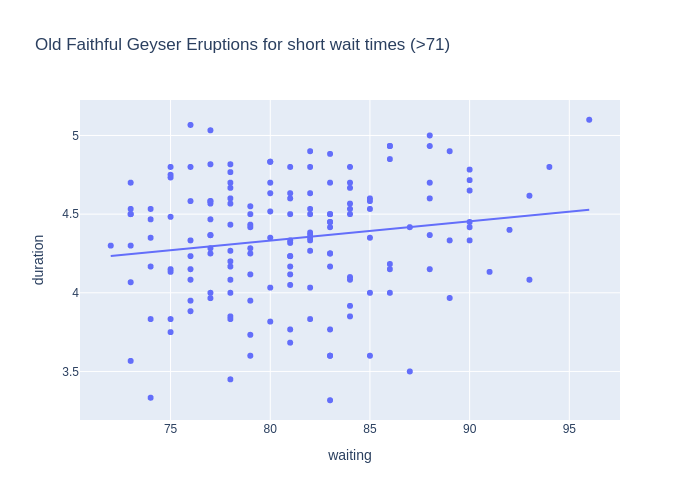

In [26]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONSimport plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models

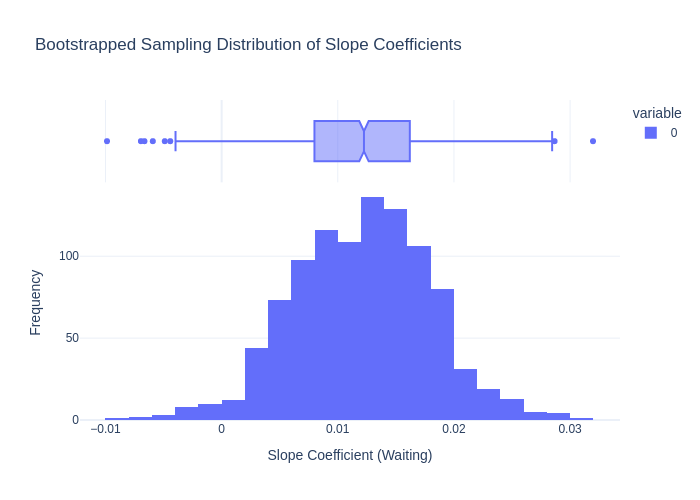

In [2]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Step 1: Filter the data for long wait times (n=160)
long_wait_data = old_faithful.nlargest(160, 'waiting')

# Step 2: Set up parameters for bootstrap
n_bootstraps = 1000  # Number of bootstrap samples
slope_coefficients = []  # To store the slope coefficients

# Step 3: Perform bootstrap sampling
for _ in range(n_bootstraps):
    # Create a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=160, replace=True)
    
    # Fit the linear model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    
    # Collect the slope coefficient
    slope_coefficients.append(fitted_model.params['waiting'])

# Step 4: Visualize the bootstrapped sampling distribution of the slope coefficients
fig = px.histogram(slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients",
                   labels={'value': 'Slope Coefficient (Waiting)'}, 
                   marginal="box", # Add a box plot to show summary statistics
                   template="plotly_white")

# Update layout for better readability
fig.update_layout(xaxis_title="Slope Coefficient (Waiting)",
                  yaxis_title="Frequency")

fig.show(renderer = "png")


2. simulate samples (of size n=160) from a Simple Linear Regression model that uses $\beta_0$ = 1.65, $\beta_1$ = 0, $\sigma$ = 0.37 along with the values of waiting for x to create simuations of Y and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"

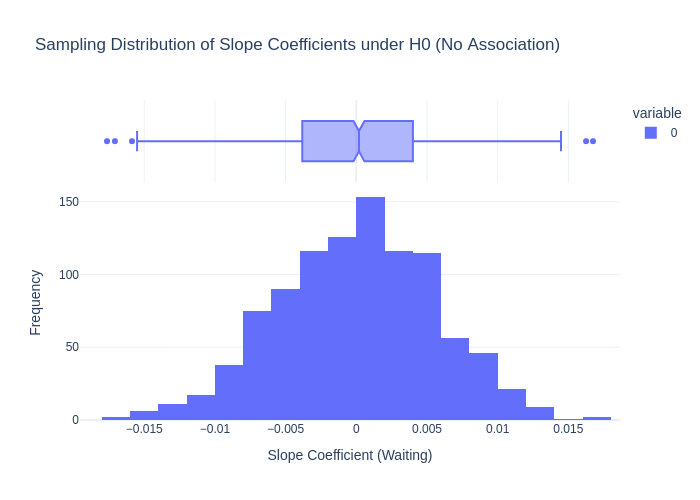

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Step 1: Filter the data for long wait times (n=160)
long_wait_data = old_faithful.nlargest(160, 'waiting')

# Parameters for the null hypothesis model
beta_0 = 1.65
beta_1 = 0  # No association under null hypothesis
sigma = 0.37
n_simulations = 1000  # Number of simulated samples
slope_coefficients_null = []  # To store the slope coefficients

# Step 2: Simulate under the null hypothesis and collect slope coefficients
for _ in range(n_simulations):
    # Generate Y values under the null hypothesis
    simulated_y = beta_0 + beta_1 * long_wait_data['waiting'] + np.random.normal(0, sigma, size=160)
    
    # Create a new DataFrame with simulated Y
    simulated_data = long_wait_data.copy()
    simulated_data['simulated_duration'] = simulated_y
    
    # Fit the linear model with simulated data
    model = smf.ols('simulated_duration ~ waiting', data=simulated_data)
    fitted_model = model.fit()
    
    # Collect the slope coefficient (should be centered around 0 if null hypothesis is true)
    slope_coefficients_null.append(fitted_model.params['waiting'])

# Step 3: Visualize the sampling distribution of the slope coefficients under H0
fig = px.histogram(slope_coefficients_null, nbins=30, title="Sampling Distribution of Slope Coefficients under H0 (No Association)",
                   labels={'value': 'Slope Coefficient (Waiting)'},
                   marginal="box",  # Adding a box plot for summary
                   template="plotly_white")

# Update layout for better readability
fig.update_layout(xaxis_title="Slope Coefficient (Waiting)",
                  yaxis_title="Frequency")

fig.show(renderer = "png")


3. report if  is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful \[long_wait\]).fit().summary().tables\[1\]?

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Filter the data for long wait times (n=160)
long_wait_data = old_faithful.nlargest(160, 'waiting')

# Fit the original OLS model on the filtered data
original_model = smf.ols('duration ~ waiting', data=long_wait_data)
fitted_model = original_model.fit()
observed_slope = fitted_model.params['waiting']  # Observed slope coefficient

# Step 1: Generate bootstrapped confidence interval
n_bootstraps = 1000
slope_coefficients_bootstrap = []

for _ in range(n_bootstraps):
    # Bootstrap sample and fit model
    bootstrap_sample = long_wait_data.sample(n=160, replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    slope_coefficients_bootstrap.append(fitted_model.params['waiting'])

# Calculate the 95% confidence interval for the slope coefficient
lower_bound = np.percentile(slope_coefficients_bootstrap, 2.5)
upper_bound = np.percentile(slope_coefficients_bootstrap, 97.5)
contains_zero = lower_bound <= 0 <= upper_bound

# Step 2: Calculate the simulated p-value under the null hypothesis
# We previously simulated slope coefficients under H0 in slope_coefficients_null

# Count the number of times the simulated slopes are as extreme or more extreme than the observed slope
simulated_p_value = np.mean([abs(slope) >= abs(observed_slope) for slope in slope_coefficients_bootstrap])

# Step 3: Compare with the p-value from the OLS model on the original data
ols_p_value = fitted_model.pvalues['waiting']

# Output the results
print(f"95% Bootstrapped Confidence Interval for Slope: ({lower_bound:.4f}, {upper_bound:.4f})")
print(f"Does the CI contain 0? {'Yes' if contains_zero else 'No'}")
print(f"Simulated p-value from bootstrap: {simulated_p_value:.4f}")
print(f"OLS p-value from original model: {ols_p_value:.4f}")


95% Bootstrapped Confidence Interval for Slope: (0.0001, 0.0228)
Does the CI contain 0? No
Simulated p-value from bootstrap: 0.4810
OLS p-value from original model: 0.0344


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


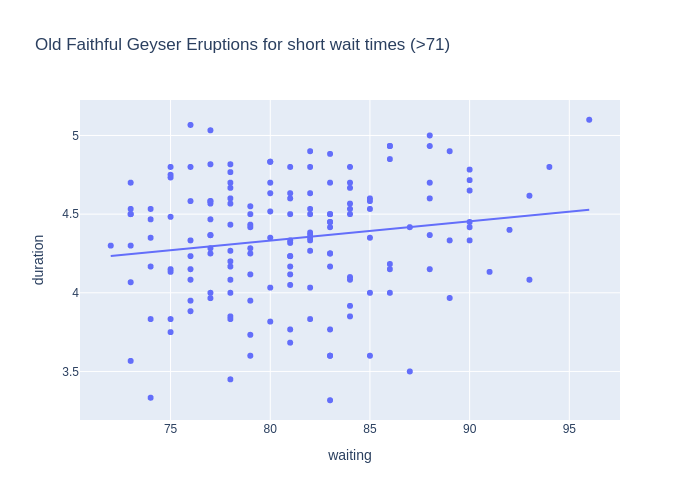

In [5]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Q11: Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length $Y_i = \beta_(intercept) + 1_["long"](k_i)\beta_(contrast) + \epsilon_i$ where $\epsilon_i ~ N(o,\sigma)$ where we use  (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model
1. smf.ols('duration ~ waiting', data=old_faithful)
2. smf.ols('duration ~ waiting', data=old_faithful\[short_wait\])
3. smf.ols('duration ~ waiting', data=old_faithful\[long_wait\])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


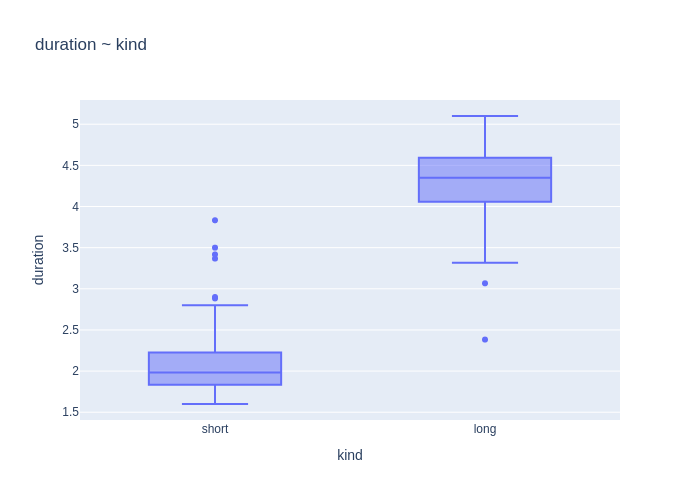

In [6]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model with categorical indicator for wait kind (short vs long):
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.0943      0.041     50.752      0.000       2.013       2.176
C(kind, Treatment(reference="short"))[T.long]     2.2036      0.052     42.464      0.000       2.101       2.306


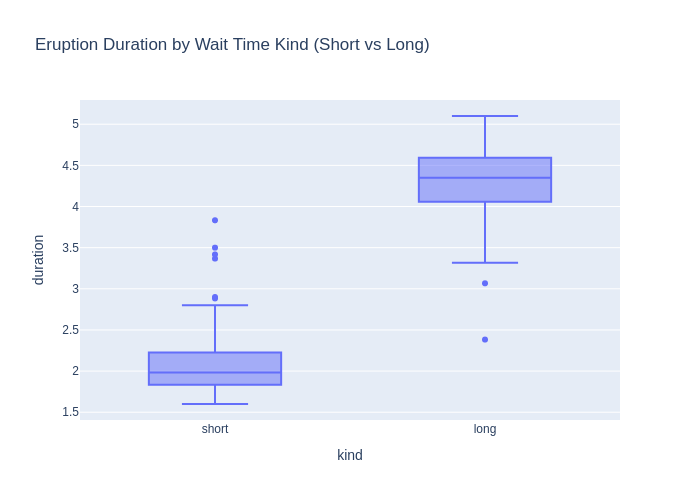

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the 'kind' indicator variable based on a 68-minute threshold
old_faithful['kind'] = ['short' if wait < 68 else 'long' for wait in old_faithful['waiting']]

# Fit the model using 'kind' as an indicator variable
indicator_model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary table for the indicator variable model
print("Model with categorical indicator for wait kind (short vs long):")
print(indicator_model.summary().tables[1])

# Visualize the distribution of eruption durations by kind
fig = px.box(old_faithful, x='kind', y='duration', 
             title="Eruption Duration by Wait Time Kind (Short vs Long)",
             category_orders={'kind': ['short', 'long']})
fig.show(renderer = "png")

Model for short wait times:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


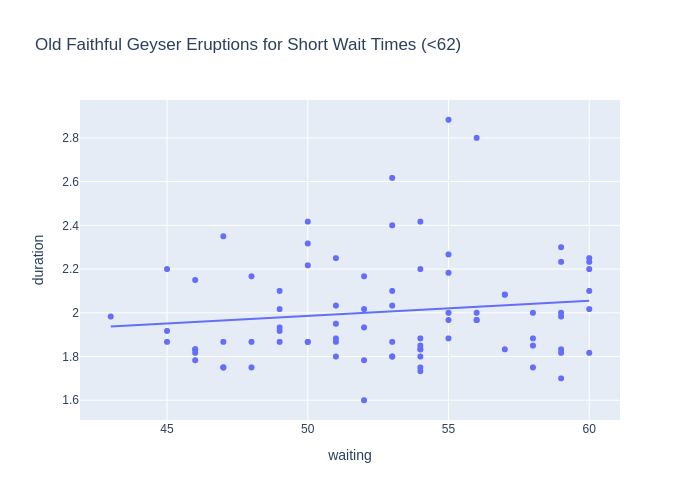

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define a threshold for short wait times
short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit

# Fit the model for short wait times and display summary
short_wait_model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
print("Model for short wait times:")
print(short_wait_model.summary().tables[1])

# Create a scatter plot with linear regression trendline for short wait times
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title=f"Old Faithful Geyser Eruptions for Short Wait Times (<{short_wait_limit})", 
                 trendline='ols')
fig.show(renderer = "png")



Model for long wait times:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6697      0.419     -1.597      0.112      -1.497       0.158
waiting        0.0610      0.005     11.511      0.000       0.051       0.071


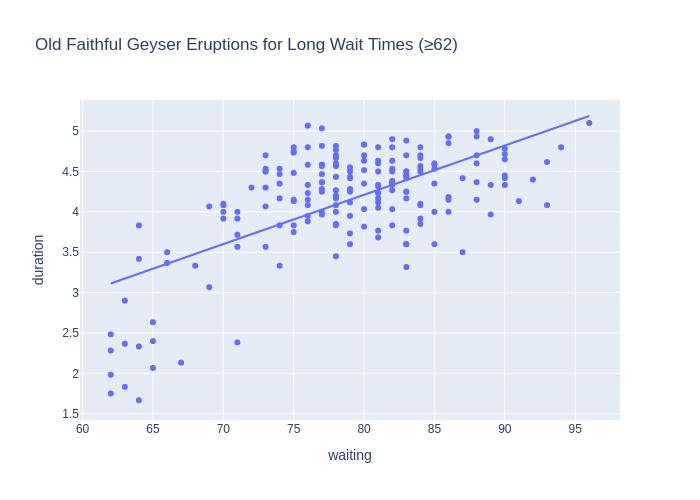

In [10]:
# Define a threshold for long wait times (complement of short wait)
long_wait = old_faithful.waiting >= short_wait_limit

# Fit the model for long wait times and display summary
long_wait_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
print("\nModel for long wait times:")
print(long_wait_model.summary().tables[1])

# Create a scatter plot with linear regression trendline for long wait times
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title=f"Old Faithful Geyser Eruptions for Long Wait Times (≥{short_wait_limit})", 
                 trendline='ols')
fig.show(renderer = "png")


Model with categorical indicator for wait kind (short vs long):
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.0058      0.064     31.528      0.000       1.881       2.131
C(kind, Treatment(reference="short"))[T.long]     2.1328      0.076     27.944      0.000       1.982       2.283


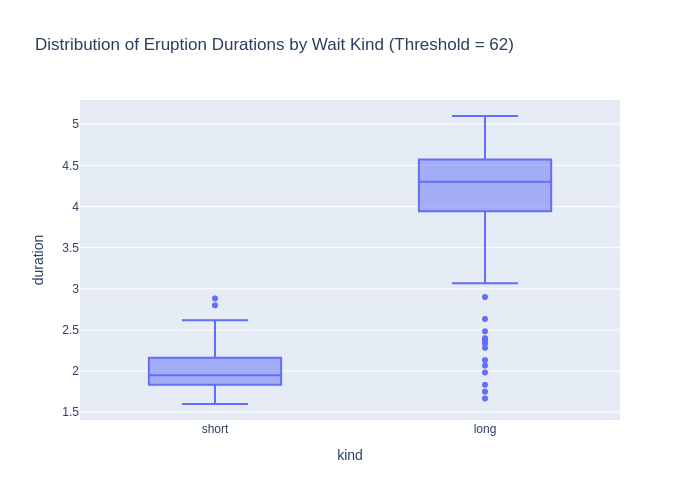

In [11]:
# Create the categorical variable 'kind' for short and long waits
old_faithful['kind'] = ['short' if wait < short_wait_limit else 'long' for wait in old_faithful['waiting']]

# Fit the indicator variable model and display the coefficient summary
indicator_model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
print("\nModel with categorical indicator for wait kind (short vs long):")
print(indicator_model.summary().tables[1])

# Visualize the distribution of eruption durations by kind
fig = px.box(old_faithful, x='kind', y='duration', 
             title=f"Distribution of Eruption Durations by Wait Kind (Threshold = {short_wait_limit})",
             category_orders={'kind': ['short', 'long']})
fig.show(renderer =  "png")

Big Picture Comparison of Models

Each model offers a unique perspective on how wait time (waiting) relates to eruption duration (duration):

Full Dataset Model:<br>
Provides a single, overall estimate for the relationship between waiting and duration.<br>
Assumes a consistent linear effect of waiting time across all values, treating the dataset as homogeneous with respect to the wait time.<br>
Short Wait and Long Wait Models:<br>
By splitting the data, these models allow us to see if the relationship between waiting time and eruption duration changes between short and long waits.<br>
They can reveal if short and long wait times have different slopes, which would suggest that the effect of waiting time on duration is not uniform across the range.<br>
This segmented approach can offer a finer-grained understanding of the relationship, helping identify any non-linear patterns that might be masked in the full dataset model.

From the code of "from IPython.display import display", we know the p-value is less than 0.001, so there is no evidence to reject the null hypothesis.

### Q12: Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

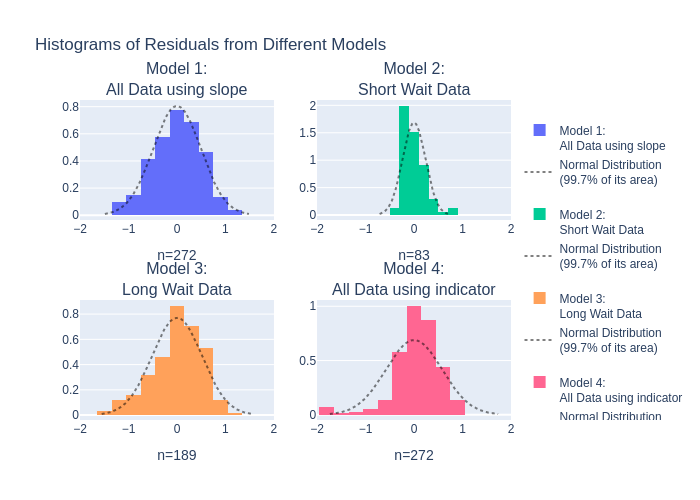

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


### Q13: The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.
1. Do a permuation test $H_0: \mu_short = \mu_long$ no difference in duration between short and long groups by "shuffling" the labels
2. Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, \[0.025, 0.975\]) to the collection of differences between the sample means.
3. Explain how the sampling approaches work for the two simulations.
4. Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.

Observed Difference in Means: -2.2036002325581396
P-value from Permutation Test: 0.0


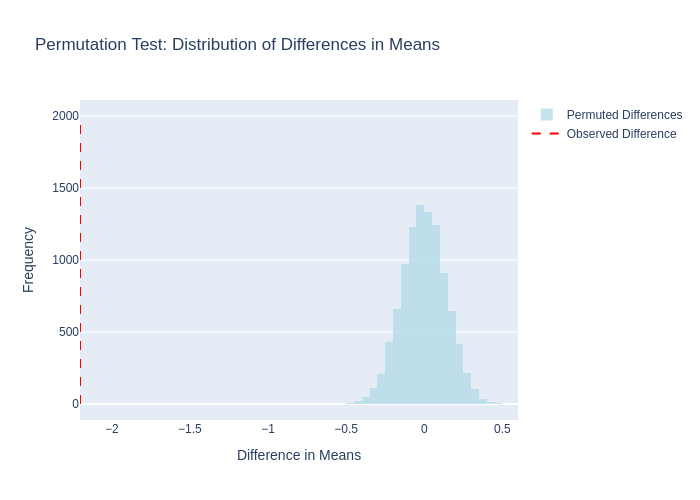

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the 'kind' indicator variable based on a 68-minute threshold
old_faithful['kind'] = ['short' if wait < 68 else 'long' for wait in old_faithful['waiting']]

# Separate durations into short and long groups
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration']
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration']

# Calculate observed difference in means
observed_diff = short_durations.mean() - long_durations.mean()
print(f"Observed Difference in Means: {observed_diff}")

# Define the permutation test function
def permutation_test(short, long, num_permutations=10000):
    combined = np.concatenate([short, long])
    n_short = len(short)
    n_long = len(long)
    
    # Store differences
    permuted_diffs = []
    
    for _ in range(num_permutations):
        # Shuffle combined array
        np.random.shuffle(combined)
        
        # Split back into two groups
        new_short = combined[:n_short]
        new_long = combined[n_short:]
        
        # Calculate difference in means
        permuted_diff = new_short.mean() - new_long.mean()
        permuted_diffs.append(permuted_diff)
    
    return np.array(permuted_diffs)

# Run the permutation test
permuted_differences = permutation_test(short_durations.values, long_durations.values)

# Calculate p-value
p_value = np.mean(np.abs(permuted_differences) >= np.abs(observed_diff))
print(f"P-value from Permutation Test: {p_value}")

# Visualize the permutation distribution using Plotly
fig = go.Figure()

# Add histogram of permuted differences
fig.add_trace(go.Histogram(
    x=permuted_differences,
    nbinsx=30,
    name='Permuted Differences',
    marker_color='lightblue',
    opacity=0.7
))

# Add a line for the observed difference
fig.add_trace(go.Scatter(
    x=[observed_diff, observed_diff],
    y=[0, 2000],  # Adjust y range according to your histogram
    mode='lines',
    line=dict(color='red', width=2, dash='dash'),
    name='Observed Difference'
))

# Update layout
fig.update_layout(
    title='Permutation Test: Distribution of Differences in Means',
    xaxis_title='Difference in Means',
    yaxis_title='Frequency',
    showlegend=True
)

# Show the figure
fig.show(renderer = "png")

95% Bootstrap Confidence Interval for the Difference in Means: [-2.30178451 -2.0997875 ]


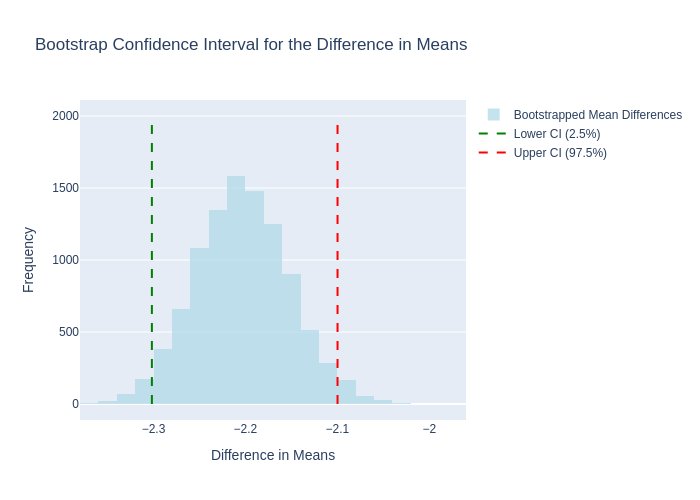

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the 'kind' indicator variable based on a 68-minute threshold
old_faithful['kind'] = ['short' if wait < 68 else 'long' for wait in old_faithful['waiting']]

# Separate durations into short and long groups
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration'].values
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration'].values

# Bootstrap function to calculate differences in means
def bootstrap_difference_in_means(short, long, num_bootstraps=10000):
    bootstrapped_mean_diffs = []
    
    for _ in range(num_bootstraps):
        # Bootstrap sample for short and long groups
        short_sample = np.random.choice(short, size=len(short), replace=True)
        long_sample = np.random.choice(long, size=len(long), replace=True)
        
        # Calculate mean difference
        mean_diff = short_sample.mean() - long_sample.mean()
        bootstrapped_mean_diffs.append(mean_diff)
    
    return np.array(bootstrapped_mean_diffs)

# Perform bootstrap
bootstrapped_mean_differences = bootstrap_difference_in_means(short_durations, long_durations)

# Calculate 95% bootstrap confidence interval
conf_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for the Difference in Means: {conf_interval}")

# Visualize the bootstrap distribution using Plotly
fig = go.Figure()

# Add histogram of bootstrapped mean differences
fig.add_trace(go.Histogram(
    x=bootstrapped_mean_differences,
    nbinsx=30,
    name='Bootstrapped Mean Differences',
    marker_color='lightblue',
    opacity=0.7
))

# Add lines for the confidence interval
fig.add_trace(go.Scatter(
    x=[conf_interval[0], conf_interval[0]],
    y=[0, 2000],  # Adjust y range according to your histogram
    mode='lines',
    line=dict(color='green', width=2, dash='dash'),
    name='Lower CI (2.5%)'
))

fig.add_trace(go.Scatter(
    x=[conf_interval[1], conf_interval[1]],
    y=[0, 2000],  # Adjust y range according to your histogram
    mode='lines',
    line=dict(color='red', width=2, dash='dash'),
    name='Upper CI (97.5%)'
))

# Update layout
fig.update_layout(
    title='Bootstrap Confidence Interval for the Difference in Means',
    xaxis_title='Difference in Means',
    yaxis_title='Frequency',
    showlegend=True
)

# Show the figure
fig.show(renderer = "png")

Key Differences Between the Two Approaches
Purpose:<br>
Permutation Test: Primarily a hypothesis test focused on assessing whether the observed difference in means is statistically significant.<br>
Bootstrap Confidence Interval: Focused on estimating the uncertainty around the difference in means and quantifying that uncertainty via a confidence interval.<br>
Data Handling:<br>
Permutation Test: Shuffles data while maintaining the overall structure to create a distribution under the null hypothesis.

Bootstrap: Resamples with replacement from the actual data, which allows for capturing variability and estimating the sampling distribution directly from the observed data.

Result Interpretation:

Permutation Test: The p-value indicates the likelihood of observing such a difference if there were no true effect.

Bootstrap Confidence Interval: The confidence interval provides a range of plausible values for the true mean difference, indicating the precision of the estimate.

a comparative table summarizing the similarities and differences between the **Indicator Variable-Based Model**, **Permutation Test**, and **Bootstrap Confidence Interval** methods:

| Aspect                            | Indicator Variable-Based Model                     | Permutation Test                                | Bootstrap Confidence Interval                   |
|-----------------------------------|--------------------------------------------------|------------------------------------------------|------------------------------------------------|
| **Objective**                     | Assess average differences in means using regression | Test the null hypothesis of no difference      | Estimate the uncertainty around the difference in means |
| **Methodology**                   | OLS regression using an indicator variable        | Shuffle group labels and calculate mean differences | Resample with replacement and calculate mean differences |
| **Assumptions**                   | - Linearity<br>- Independence<br>- Normality of residuals | - Exchangeability of data under null hypothesis | - Independence and identical distribution of observations |
| **Statistical Framework**         | Parametric approach with specific distribution assumptions | Non-parametric approach, no specific assumptions | Non-parametric approach, no specific distribution assumptions |
| **Interpretation of Results**     | Provides coefficients for the average effect (difference) | Provides a p-value indicating significance of difference | Provides a confidence interval indicating uncertainty of mean difference |
| **Focus of Analysis**             | Explicitly models the relationship between variables | Focuses on how likely the observed difference is under the null hypothesis | Focuses on estimating the distribution of mean differences |
| **Flexibility and Robustness**    | Sensitive to violations of assumptions             | More robust to distributional assumptions      | More robust to distributional assumptions      |
| **Statistical Output**            | Coefficients, p-values, R², residuals            | p-value derived from permuted differences      | Percentiles for confidence interval            |


#### Q14: YES?